In [27]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [28]:
#reading data from city_day.csv taken from kaggle from 01-01-2015 to 31-12-2024 of various Indian Cities
df = pd.read_csv("/home/sumit/SylphQI/data/India_Cities_AQI_Weather_2015_2024_Combined.csv")

In [29]:
df.head()

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Delhi,Delhi,282,Poor,121,180,86,63,5.75,...,-6.0,-1.5,76.4,0.0,11.1,N,1010.55,14.9,1,Winter
1,2015-01-02,Delhi,Delhi,210,Poor,85,139,59,45,4.10,...,-8.8,-3.1,48.9,0.0,9.2,S,1015.14,14.5,1,Winter
2,2015-01-03,Delhi,Delhi,257,Poor,107,168,72,59,5.54,...,-4.5,-0.3,53.7,0.0,7.1,NE,1017.66,14.2,1,Winter
3,2015-01-04,Delhi,Delhi,193,Moderate,88,126,48,36,3.58,...,-7.3,-0.6,76.7,0.0,10.4,NW,1009.99,15.0,1,Winter
4,2015-01-05,Delhi,Delhi,274,Poor,124,145,83,53,4.85,...,-3.1,4.4,66.1,0.0,12.8,NE,1016.24,15.0,1,Winter


In [6]:
group_df = df.groupby('City')

In [7]:
df = group_df.get_group('Delhi')

In [8]:
df.head()

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Delhi,Delhi,282,Poor,121,180,86,63,5.75,...,-6.0,-1.5,76.4,0.0,11.1,N,1010.55,14.9,1,Winter
1,2015-01-02,Delhi,Delhi,210,Poor,85,139,59,45,4.10,...,-8.8,-3.1,48.9,0.0,9.2,S,1015.14,14.5,1,Winter
2,2015-01-03,Delhi,Delhi,257,Poor,107,168,72,59,5.54,...,-4.5,-0.3,53.7,0.0,7.1,NE,1017.66,14.2,1,Winter
3,2015-01-04,Delhi,Delhi,193,Moderate,88,126,48,36,3.58,...,-7.3,-0.6,76.7,0.0,10.4,NW,1009.99,15.0,1,Winter
4,2015-01-05,Delhi,Delhi,274,Poor,124,145,83,53,4.85,...,-3.1,4.4,66.1,0.0,12.8,NE,1016.24,15.0,1,Winter


## Feature Engineering

In [9]:
#Extracting time features from date column
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3653 entries, 0 to 3652
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      3653 non-null   datetime64[ns]
 1   City                      3653 non-null   object        
 2   State                     3653 non-null   object        
 3   AQI                       3653 non-null   int64         
 4   AQI_Category              3653 non-null   object        
 5   PM2.5                     3653 non-null   int64         
 6   PM10                      3653 non-null   int64         
 7   NO2                       3653 non-null   int64         
 8   SO2                       3653 non-null   int64         
 9   CO                        3653 non-null   float64       
 10  O3                        3653 non-null   int64         
 11  NH3                       3653 non-null   int64         
 12  Max_Temperature_C        

In [11]:
#drop unnecssary columns
df = df.drop(['City', 'State', 'Date', 'Month', 'Season','Wind_Direction'], axis=1)

In [12]:
df.columns

Index(['AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3',
       'Max_Temperature_C', 'Min_Temperature_C', 'Avg_Temperature_C',
       'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh',
       'Atmospheric_Pressure_hPa', 'Visibility_km', 'year', 'month', 'day'],
      dtype='object')

In [13]:
#Splitting categorical and numerical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']


In [14]:
print(f'total number of categorical features are {len(categorical_features)}')
print(f'total number of numerical features are {len(numerical_features)}')


total number of categorical features are 1
total number of numerical features are 19


In [15]:
df['AQI_Category'].value_counts()

AQI_Category
Moderate        2327
Poor            1109
Satisfactory     139
Very Poor         73
Good               5
Name: count, dtype: int64

<Axes: xlabel='AQI_Category'>

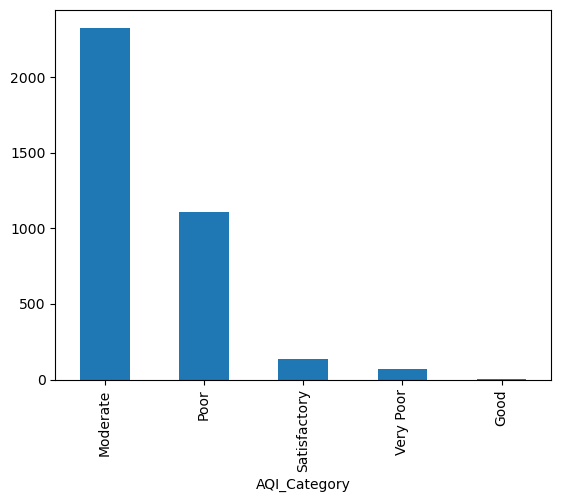

In [16]:
df['AQI_Category'].value_counts().plot(kind='bar')

In [17]:
#encoding and scaling the features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder()
scaler = StandardScaler()

In [18]:
AQI_Category_encoded = ohe.fit_transform(df[['AQI_Category']]).toarray()
encoded_df1 = pd.DataFrame(AQI_Category_encoded, columns=ohe.get_feature_names_out())

In [19]:
encoded_df1.head()

,AQI_Category_Good,AQI_Category_Moderate,AQI_Category_Poor,AQI_Category_Satisfactory,AQI_Category_Very Poor
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [20]:
num_encoded = scaler.fit_transform(df[numerical_features])
encoded_df2 = pd.DataFrame(num_encoded, columns=scaler.get_feature_names_out())

In [21]:
encoded_df2.tail()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,NH3,Max_Temperature_C,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Atmospheric_Pressure_hPa,Visibility_km,year,month,day
3648,1.306748,1.174249,1.379690,1.380666,0.904714,0.411006,-0.337152,1.349301,-1.452026,-1.332479,-1.398874,-0.937653,-0.25844,-0.326955,-1.953270,1.353673,1.566348,1.588255,1.280392
3649,0.985799,0.661934,0.340031,0.533766,1.161088,1.208231,1.401967,0.456061,-1.583832,-1.387611,-1.488976,-0.154704,-0.25844,0.692017,2.008925,1.294730,1.566348,1.588255,1.394017
3650,0.343901,0.405776,0.599945,0.816066,0.648340,0.656958,0.303576,0.456061,-1.660140,-1.628815,-1.648388,-0.178919,-0.25844,0.396187,-0.171826,1.294730,1.566348,1.588255,1.507642
3651,0.362780,0.704627,0.628825,-0.313134,0.477424,0.139610,0.166277,-0.933423,-1.306346,-1.332479,-1.322633,-1.147515,-0.25844,0.396187,-0.213649,1.235787,1.566348,1.588255,1.621267
3652,2.118560,2.028109,2.737022,2.509866,1.588378,2.039381,2.637657,1.845545,-1.445089,-1.559899,-1.509769,0.571743,-0.25844,1.710990,0.648694,0.292698,1.566348,1.588255,1.734893


In [22]:
#comibing both dataframes
df = pd.concat([encoded_df2,encoded_df1], axis=1)

In [23]:
df.columns

Index(['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3',
       'Max_Temperature_C', 'Min_Temperature_C', 'Avg_Temperature_C',
       'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh',
       'Atmospheric_Pressure_hPa', 'Visibility_km', 'year', 'month', 'day',
       'AQI_Category_Good', 'AQI_Category_Moderate', 'AQI_Category_Poor',
       'AQI_Category_Satisfactory', 'AQI_Category_Very Poor'],
      dtype='object')

In [24]:
df.head()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,NH3,Max_Temperature_C,Min_Temperature_C,...,Atmospheric_Pressure_hPa,Visibility_km,year,month,day,AQI_Category_Good,AQI_Category_Moderate,AQI_Category_Poor,AQI_Category_Satisfactory,AQI_Category_Very Poor
0,1.929766,2.113495,2.101675,1.832346,2.357501,1.827353,1.585032,1.547799,-1.514460,-1.339370,...,-0.265429,1.471559,-1.566634,-1.601193,-1.673865,0.0,0.0,1.0,0.0,0.0
1,0.570453,0.576548,0.917619,0.307926,0.819256,0.427968,0.944304,0.555310,-1.542209,-1.532333,...,0.191632,1.353673,-1.566634,-1.601193,-1.560240,0.0,0.0,1.0,0.0,0.0
2,1.457783,1.515793,1.755122,1.041906,2.015669,1.649249,0.944304,2.044043,-1.452026,-1.235997,...,0.442568,1.265258,-1.566634,-1.601193,-1.446615,0.0,0.0,1.0,0.0,0.0
3,0.249504,0.704627,0.542187,-0.313134,0.050133,-0.013050,0.852772,0.158315,-1.306346,-1.428960,...,-0.321193,1.501031,-1.566634,-1.601193,-1.332990,0.0,1.0,0.0,0.0,0.0
4,1.778732,2.241574,1.090895,1.662966,1.502920,1.064052,2.179994,1.150803,-0.910928,-1.139516,...,0.301168,1.501031,-1.566634,-1.601193,-1.219364,0.0,0.0,1.0,0.0,0.0


In [102]:
#defining independent and dependent features
independent = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3',
       'Max_Temperature_C', 'Min_Temperature_C', 'Avg_Temperature_C',
       'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh',
       'Atmospheric_Pressure_hPa', 'Visibility_km', 'year', 'month', 'day']
dependent = ['AQI']

X = df[independent]
y = df[dependent]

In [105]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [107]:
##Creating Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [108]:
## Selecting best model
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1896
- Mean Absolute Error: 0.1500
- R2 Score: 0.9635
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1923
- Mean Absolute Error: 0.1541
- R2 Score: 0.9647


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9919
- Mean Absolute Error: 0.8015
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0240
- Mean Absolute Error: 0.8268
- R2 Score: -0.0015


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1896
- Mean Absolute Error: 0.1501
- R2 Score: 0.9635
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1924
- Mean Absolute Error: 0.1541
- R2 Score: 0.9647


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2166
- Mean Absolute Error: 0.1722
- R2 Score: 0.9523
----------------------

## Observation 

Random Forest Regressor has High accuracy score(r2_score) and comparitively less error. So this is the selected model.

In [115]:
#defining parameter
rf_params = {"max_depth": [5, 8, 15, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [116]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator= RandomForestRegressor(), param_distributions=rf_params, n_iter=100, cv=3, verbose=2, n_jobs=1)

In [117]:
random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.5s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.2s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.2s
[CV] END max_depth=8, max_features=8, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=8, max_features=8, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=8, max_features=8, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, max_features=8, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, max_features=8, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, max_features=8, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimat

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 8, ...], 'max_features': [5, 7, ...], 'min_samples_split': [2, 8, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,100
,scoring,None
,n_jobs,1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [118]:
random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': 5,
 'max_depth': 15}

In [119]:
y_pred = random.predict(X_test)

In [120]:
evaluate_model(y_test, y_pred)

(0.16439216731721118, 0.20708392397213846, 0.9590385311411658)